In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

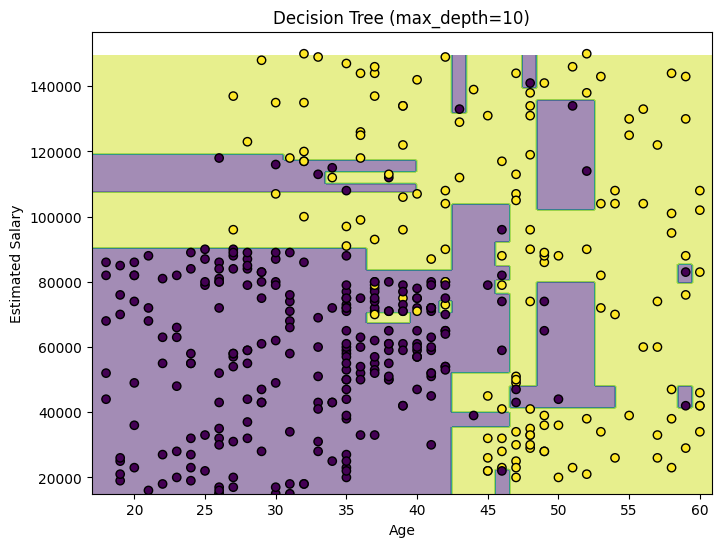

In [13]:
def analyzer(max_depth=None):
    # Load data
    data = pd.read_csv("Social_Network_Ads.csv")
    X = data.iloc[:, 2:4].values
    y = data.iloc[:, -1].values

    # Train model
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, y)

    # Define grid limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # IMPORTANT: use reasonable step sizes
    x_step = (x_max - x_min) / 300   # ~300 points
    y_step = (y_max - y_min) / 300

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, x_step),
        np.arange(y_min, y_max, y_step)
    )

    # Predict grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.title(f"Decision Tree (max_depth={max_depth})")
    plt.show()

# Call
analyzer(max_depth=10)
